<a href="https://colab.research.google.com/github/rsudiplive/EDA_CapstoneProjects/blob/main/Detailed_Airbnb_Bookings_Analysis_final1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Okay, before going to start. Let's understand what is Airbnb?

Looks Airbnb has interesting breakdown with names likely: Air, Bed and Breakfast to become Airbnb. Wow! This San-Francisco based startup offers you someone’s home as a place to stay instead of a hotel. Looks, somewhat on a same business as OYO but the former doesn't owns any property instead acts as an intermediary between those who want to rent out space and those who are looking for space to rent. 

Well, enough of it we understood what is the data all about and where it came from. 

Excited much? Lets deep dive!

Let me include all the soldiers in the battle!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_air=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/Airbnb NYC 2019.csv')
df_air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
#checking what are the variables here:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
#basic information about the dataset
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#just a sanity check:
#looks all the property ids are different and each listings are different here!

df_air['id'].nunique()

48895

**So what are the numerical and categorical variables?**

By basic inspection I figured out that a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category. <br>

While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review,	reviews_per_month	calculated_host_listings_count,	availability_365 are numerical variables

In [7]:
#looking out for categorical variables
df_air.loc[df_air['name']=='Clean & quiet apt home by the park']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [8]:
df_air[df_air['host_name']=='John'] #experimenting 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


In [9]:
df_air[df_air['host_name']=='John']['name'].nunique()

293

In [10]:
df_air['neighbourhood'].nunique() #looks this can be a categorical var too. lets check as well

221

In [11]:
#experiment: Lets take one neighbourhood and test
df_air[df_air['neighbourhood']=='Kips Bay']
#looks yes, its a categorical variable having identical neighbourhoods

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
54,14322,Beautiful Apartment in Manhattan!!!,56284,Francesca,Manhattan,Kips Bay,40.73961,-73.98074,Entire home/apt,200,7,19,2019-03-25,0.22,1,257
115,26954,NYC fabulous views Manhattan's eye,115157,Nimo,Manhattan,Kips Bay,40.74294,-73.98009,Entire home/apt,199,5,38,2015-12-02,0.38,1,260
355,98330,LOVELY APARTMENT IN THE HEART OF NY,31374,Shon,Manhattan,Kips Bay,40.73877,-73.97707,Entire home/apt,125,4,1,2012-01-03,0.01,3,181
502,177606,SPACIOUS ALCOVE STUDIO/ JUNIOR ONE,849492,Kathrine,Manhattan,Kips Bay,40.74112,-73.97686,Entire home/apt,189,6,90,2019-06-23,0.95,1,303
628,237127,LOCATION LOCATION LOCATION Liz's,1146958,Liz,Manhattan,Kips Bay,40.73833,-73.98186,Entire home/apt,195,30,139,2019-04-28,1.59,4,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48203,36137740,Cozy Kips Bay Apartment,30933227,Dipti,Manhattan,Kips Bay,40.74133,-73.97706,Entire home/apt,130,30,1,2019-06-28,1.00,1,54
48432,36265549,Perfect Location - Midtown Manhattan Modern 2BD!,272747109,Lynn,Manhattan,Kips Bay,40.74612,-73.97960,Entire home/apt,220,4,0,NaN,NaN,1,78
48453,36272851,Private Bedroom in a Prewar Gramercy Building!*,19962052,Thikshan,Manhattan,Kips Bay,40.73929,-73.98183,Private room,135,2,1,2019-07-07,1.00,3,41
48480,36279030,Good-looking Room,272602584,Cherry,Manhattan,Kips Bay,40.74010,-73.98256,Private room,70,20,0,NaN,NaN,1,314


In [12]:
df_air['host_name'].nunique() #unique hosts

11452

In [13]:
df_air['name'].nunique() #unique listings

47905

In [14]:
df_air['name'].value_counts() 
#an interesting observation, looks like few listings have no particular host name as below observation!
#also few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

Hillside Hotel                                   18
Home away from home                              17
New york Multi-unit building                     16
Brooklyn Apartment                               12
Private Room                                     11
                                                 ..
1 Bedroom Apartment in Gramcery!                  1
Brooklyn Stunning Event Space.                    1
Cozy 1 bdrm near Prospect Park/BK                 1
Spacious Harlem Apartment perfect for groups      1
Large Sunny Williamsburg Apt Near L train #2`     1
Name: name, Length: 47905, dtype: int64

In [15]:
df_air[df_air['name']==df_air['host_name']] #looks there are few listings where the property name and the host have same names!
#we can remove duplicates later in our analysis!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


In [16]:
df_air[df_air['name']=='New york Multi-unit building'] #so on this viewpoint name also comes under categorical var!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2751,1489426,New york Multi-unit building,7964729,Justin,Manhattan,Financial District,40.70582,-74.00888,Entire home/apt,390,3,1,2018-09-13,0.10,1,0
19016,15100883,New york Multi-unit building,95623284,Pablo,Bronx,Fordham,40.86533,-73.89713,Private room,40,3,1,2018-09-24,0.10,1,179
33473,26463879,New york Multi-unit building,21682640,Clarise,Brooklyn,Flatbush,40.64258,-73.95952,Private room,65,30,0,NaN,NaN,2,365
34613,27457026,New york Multi-unit building,125320407,Sata,Queens,Jamaica,40.70653,-73.80561,Entire home/apt,1000,2,0,NaN,NaN,5,365
35177,27906346,New york Multi-unit building,27071572,Kinga,Manhattan,Upper West Side,40.79372,-73.97431,Entire home/apt,140,5,3,2019-04-24,0.29,1,89
35395,28078505,New york Multi-unit building,122849679,Maria,Brooklyn,Sheepshead Bay,40.59085,-73.95405,Private room,70,1,2,2018-11-03,0.20,1,0
35618,28284458,New york Multi-unit building,213604995,Doreen,Brooklyn,Bushwick,40.68705,-73.91456,Private room,75,2,85,2019-07-05,8.31,2,309
35810,28427324,New york Multi-unit building,214141672,Monica,Queens,Astoria,40.76466,-73.92731,Private room,120,1,1,2018-09-19,0.10,1,362
35918,28534405,New york Multi-unit building,2891643,Jacqueline,Manhattan,Harlem,40.82146,-73.94598,Private room,50,1,0,NaN,NaN,1,0
36180,28761735,New york Multi-unit building,65827591,Nubia,Queens,Maspeth,40.73616,-73.89926,Shared room,55,1,0,NaN,NaN,3,47


In [17]:
df_air.loc[(df_air['neighbourhood_group']=='Manhattan') & (df_air['host_name']=='Natasha')] #experiment

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4702,3304307,Lovely Shiny Private Room in NYC,12465884,Natasha,Manhattan,East Harlem,40.79269,-73.94218,Private room,100,3,64,2019-06-01,1.05,1,219
4853,3458525,Modern & Cozy 1BD Garden Apt,17430718,Natasha,Manhattan,Harlem,40.81511,-73.94315,Entire home/apt,115,3,64,2019-06-19,1.05,2,211
8686,6673630,Stylish L.E.S Studio,6591262,Natasha,Manhattan,Lower East Side,40.71661,-73.98916,Entire home/apt,150,3,1,2015-08-01,0.02,1,0
9376,7193201,Private RM in Heart of East Village,33739627,Natasha,Manhattan,East Village,40.72896,-73.98430,Private room,99,1,4,2015-10-24,0.08,1,0
10310,7894907,Cosy studio in East Village,1830864,Natasha,Manhattan,East Village,40.72395,-73.98001,Entire home/apt,150,2,25,2016-07-22,0.55,1,0
11344,8813547,For Christmas-Large New 1 BR Near Central Park,30350590,Natasha,Manhattan,Theater District,40.76268,-73.98407,Private room,230,5,10,2016-09-10,0.23,1,0
20061,16066223,"Spacious, quiet 1 br apt in beautiful Inwood!",1713011,Natasha,Manhattan,Inwood,40.86757,-73.92699,Entire home/apt,89,14,14,2019-05-13,0.57,1,4
21145,16779705,Cozy West Village Studio,11699846,Natasha,Manhattan,Greenwich Village,40.73239,-73.99960,Entire home/apt,103,2,15,2018-10-28,0.57,1,0
22125,17808917,Gorgeous & Spacious UES apartment,85218001,Natasha,Manhattan,Upper East Side,40.77666,-73.95618,Private room,105,2,8,2018-06-16,0.30,1,0
24200,19499668,Cozy Sofa Bed in Upper Manhattan,3372118,Natasha,Manhattan,Washington Heights,40.84133,-73.93739,Shared room,50,1,21,2019-06-15,0.86,1,188


In [18]:
df_air['host_id'].value_counts()[:4]

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

So, far I was trying to understand more deep on the two variables: name and host_name & its relationship with neighbourhood_group and neighbourhood.(only from the values present inside) <br>

Found out that: A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each listing/property in a neighbourhood)

Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb. 

We'll not bother much as these are not that important in our analysis and proceed further!

In [19]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Looks there are some property listed with 0 listed price!

In [21]:
len(df_air[df_air['price']==0]) #so 11 property/listings have 0 price listed.

11

In [22]:
#if a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
#name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews
#these are the important ones in our analysis. We'll crosscheck though at last!

In [23]:
df_air['host_name'].value_counts()

Michael            417
David              403
Sonder (NYC)       327
John               294
Alex               279
                  ... 
Gladys Germania      1
Sweet Home           1
Emee                 1
Radilena             1
David & Elaine       1
Name: host_name, Length: 11452, dtype: int64

Let's do this problem step by step!

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


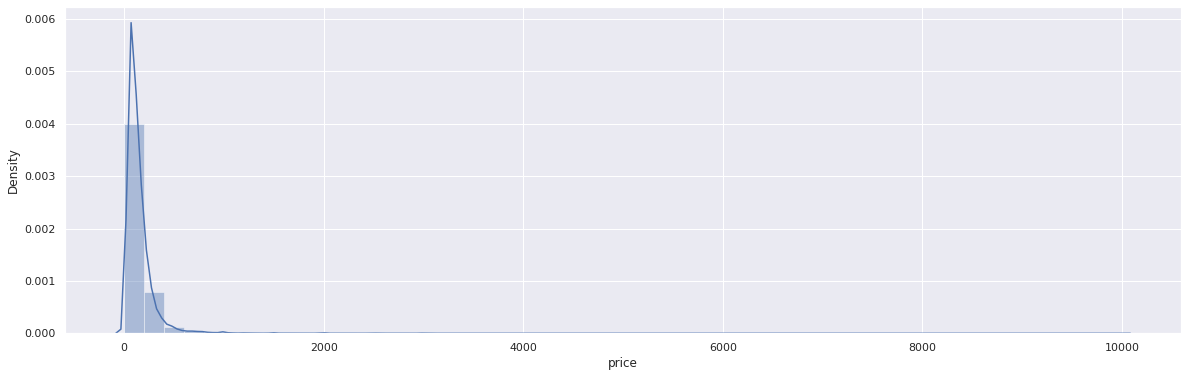

In [24]:
#distplot
# f,ax=plt.subplots(figsize=(8,6))
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df_air['price'],hist=True)

In [25]:
#The distribution tells it has positive skew
#also the distribution doesn't deviate much from normal distribution.

In [26]:
#skewness and kurtosis
print("Skewness: %f" % df_air['price'].skew())
print("Kurtosis: %f" % df_air['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


In [27]:
#looks the skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed.
#Also kurtosis looks high as well which indicates presence of good amount of outliers,we will look later into that when we handle outliers!!

**checking the relationship between numerical variables!**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


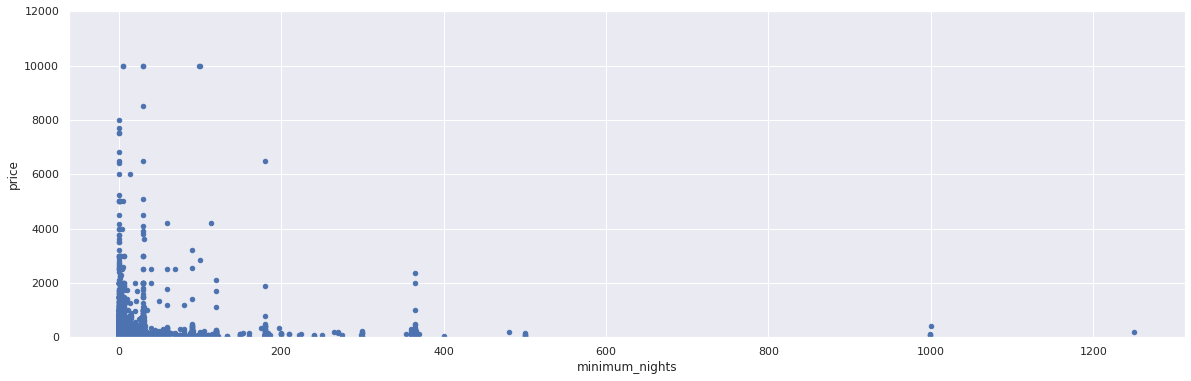

In [28]:
# price vs minimum_nights

var='minimum_nights'

data=pd.concat([df_air['price'],df_air[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000))

In [29]:
#looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.
#there are many outliers as well.

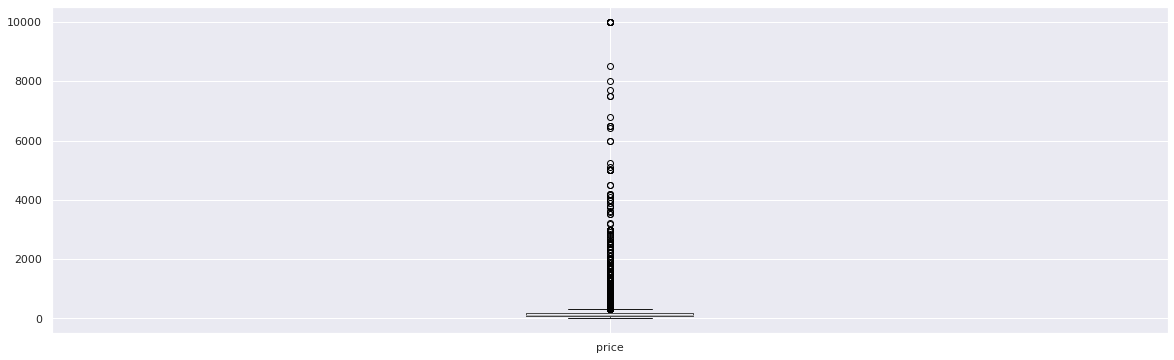

In [30]:
df_air.boxplot(column=['price'])
plt.show()
#we can see the presence of many outliers in price. Definitely we'll remove those, Patience!

In [31]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [32]:
#looks there are many 0 reviews as well for varied prices, even at the highest price(10000) too.
#seems many of the reviews are not there.

The numerical variables: price,minimum_nights,number_of_reviews,reviews_per_month has minimum values as 0.

In [33]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let's check the **correlation** matrix to understand how are the features interrelated with each other.<br> 

Also to get an idea which are the most important features in this data.




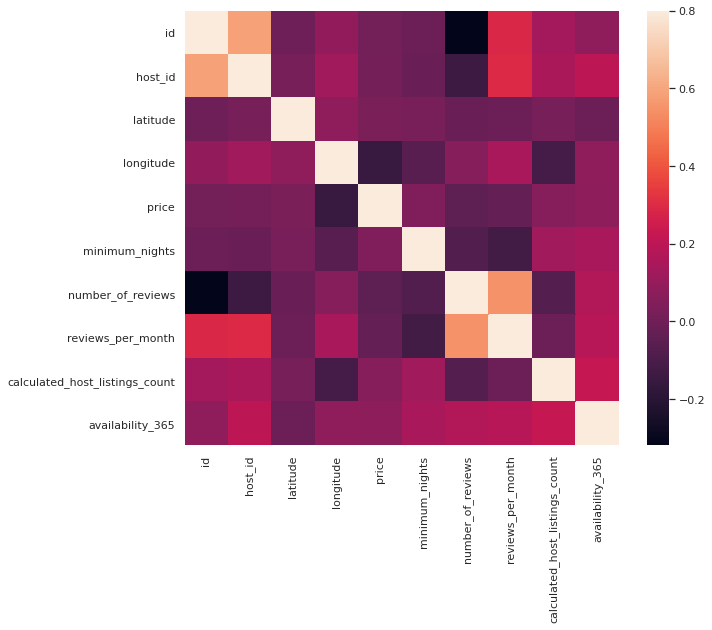

In [34]:
#correlation matrix
corrmat = df_air.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing. <br>

Guess what? There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count. <br>

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

**Data Pre-processing:**

In [35]:
#checking null values!

df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Missing values**

As, host_names and names are not that important in our analysis, so atleast we are good to remove rows with nan's in both the columns!

In [36]:
df_air[df_air['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [37]:
df_air[df_air['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [38]:
#since both 'name' and 'host_name' has very less missing values as compared to 47,905 listings and 11452 unique hosts!

df_air= df_air.dropna(subset=['name'])
df_air= df_air.dropna(subset=['host_name'])

In [39]:
df_air[['host_name','name']].isnull().values.any() #looks the null values are removed!

False

In [40]:
no_of_hosts= df_air['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')
no_of_listings= df_air['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11450
The total no of listings in NYC: 47884


In [41]:
df_air.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Also the column: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

In [42]:
df_air= df_air.drop(['last_review'],axis=1)

In [43]:
df_air.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [44]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  reviews_per_month               

**Checking for duplicate data**

In [45]:
duplicate_data = df_air.duplicated()
print(duplicate_data.sum())
df_air[duplicate_data]
#looks like there's no duplicate data present!

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


The reviews_per_month column containing null values and we can simple put 0 reviews by replacing NAN's<br>
makes sense right? 

In [46]:
df_air['reviews_per_month']=df_air['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [47]:
df_air['reviews_per_month'].isnull().values.any()

False

In [48]:
df_air.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355


**Univariate Analysis!**

Let's check the most no of listings in NYC first!

In [49]:
#top 10 listings on Airbnb in entire NYC:

listings_count_df=df_air['name'].value_counts()[:10].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
# sns.countplot(x='name',data=listings_count_df,hue='room_type')
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Private Room,11
5,Loft Suite @ The Box House Hotel,11
6,Private room,10
7,Artsy Private BR in Fort Greene Cumberland,10
8,Private room in Brooklyn,8
9,Cozy Brooklyn Apartment,8


In [50]:
top_10_hosts=df_air['host_name'].value_counts()[:10] #top 10 hosts on the basis of no of listings in entire NYC!

In [51]:
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

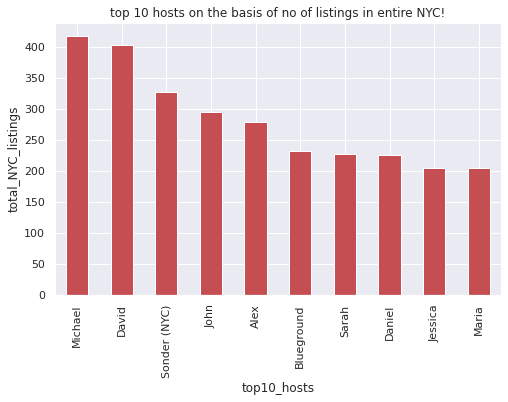

In [158]:
top_10_hosts.plot(kind='bar',color='r')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

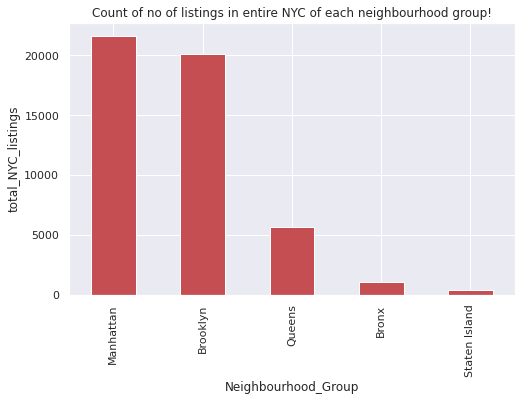

In [157]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df_air['neighbourhood_group'].value_counts().plot(kind='bar',color='r')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

In [54]:
df_air['neighbourhood'].unique() #looking at the unique neighbourhoods 

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

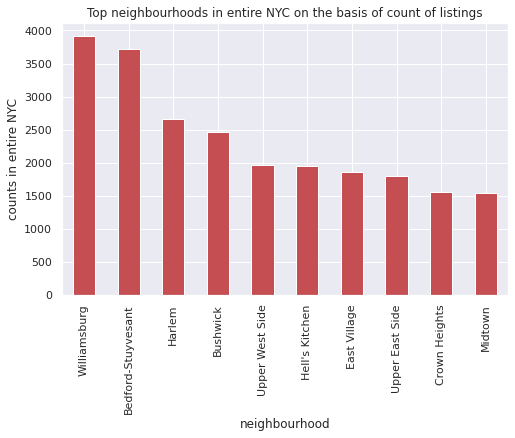

In [156]:
top_10_neigbours= df_air['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='r')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of each room types in entire NYC')

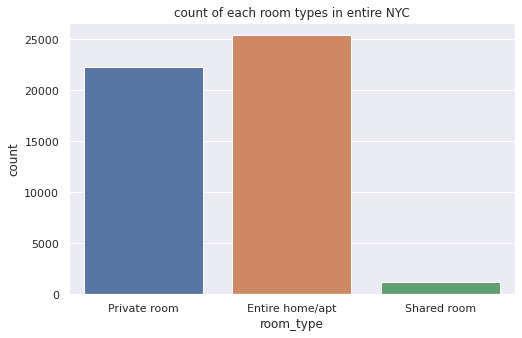

In [56]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(df_air['room_type'])
plt.title('count of each room types in entire NYC')

Text(0.5, 1.0, 'count of room types of each neighbourhood group in entire NYC')

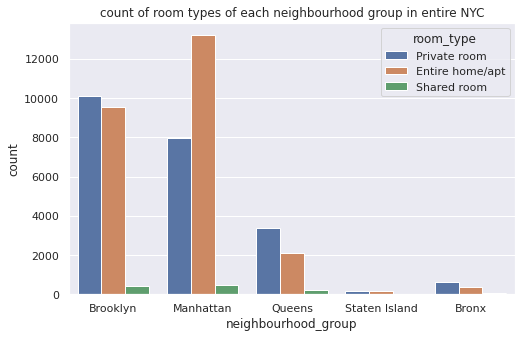

In [57]:
#count of each category of room type in each neighbourhood group in entire NYC!
#relationship between two categorical variables.

ax = sns.countplot(x="neighbourhood_group",hue="room_type", data=df_air)
ax.set_title('count of room types of each neighbourhood group in entire NYC')

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


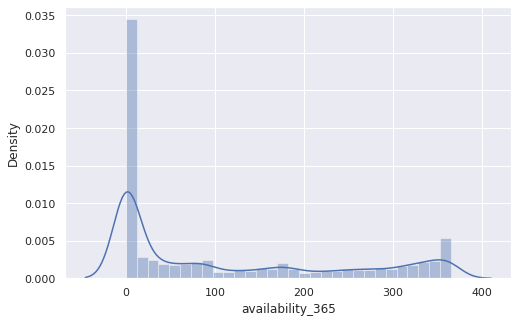

In [58]:
#distribution of listings availability at NYC!
sns.distplot(df_air['availability_365'])

availability_365 have uniform distribution with availability ranging from 0 to 370<br>

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)<br>

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

In [59]:
#skewness and kurtosis
print("Skewness: %f" % df_air['availability_365'].skew())
print("Kurtosis: %f" % df_air['availability_365'].kurt())

Skewness: 0.763087
Kurtosis: -0.997818


Reviews/month distribution as per listings in NYC

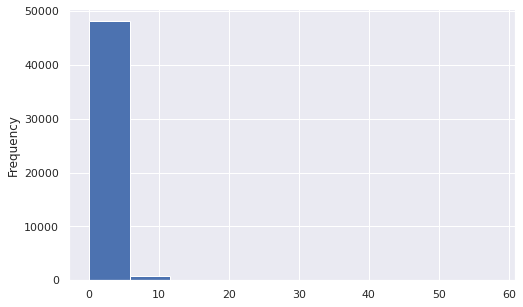

In [60]:
df_air['reviews_per_month'].plot.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


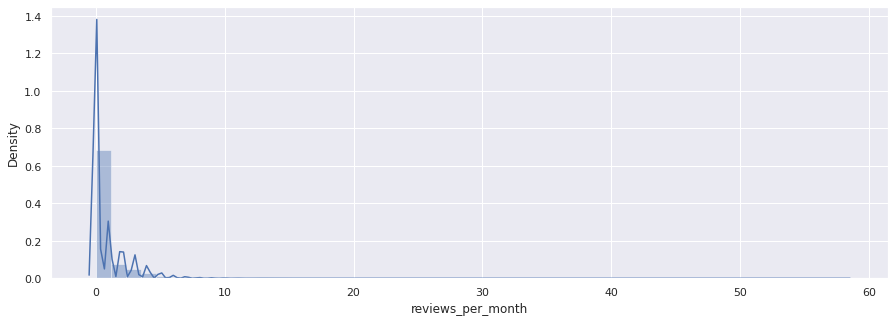

In [61]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_air['reviews_per_month'])


Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.<br>

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

In [62]:
#skewness and kurtosis
print("Skewness: %f" % df_air['reviews_per_month'].skew())
print("Kurtosis: %f" % df_air['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large amount of outliers.

Skewness: 3.752695
Kurtosis: 54.368170


**Feature Engineering:**

**Handling the outliers**

The famous price column?!

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


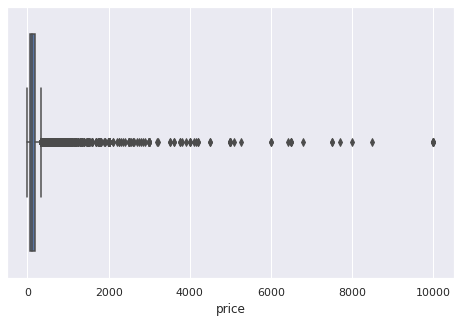

In [63]:
sns.boxplot(df_air['price'])

In [64]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,0.806378,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.502822,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


In [65]:
#using quantile approach to remove outliers.

In [66]:
min_threshold,max_threshold= df_air.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [67]:
df_air[df_air.price<min_threshold] #looks absurd ranges of min prices

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0,6,338


In [68]:
df_air[df_air.price>max_threshold] #similary for getting extreme price value above max_threshold

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,0,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,0,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,0,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,0,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,0,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,0,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,0,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0,11,365


In [69]:
df_air_pnw= df_air[(df_air.price>min_threshold)&(df_air.price<max_threshold)]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


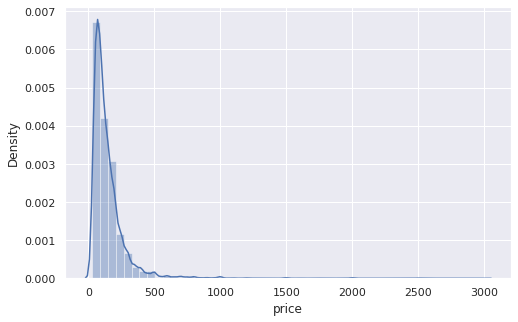

In [70]:
sns.distplot(df_air_pnw['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


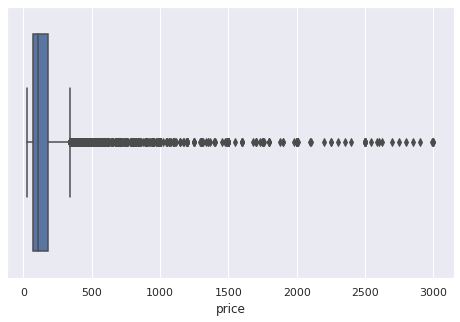

In [71]:
sns.boxplot(df_air_pnw['price']) #looks there are still many outliers!

In [72]:
#skewness and kurtosis
print("Skewness: %f" % df_air_pnw['price'].skew())
print("Kurtosis: %f" % df_air_pnw['price'].kurt())

Skewness: 6.377899
Kurtosis: 70.372674


**Removing Outliers using IQR approach!**
(has performed best in removing outliers)



In [73]:
#trying removing outliers using IQR!

In [74]:
Q1 = df_air.quantile(0.25)
Q3 = df_air.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968167e+07
host_id                           9.961575e+07
latitude                          7.301750e-02
longitude                         4.679000e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [75]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [76]:
lower_bound,upper_bound = outlier_treatment(df_air['price'])

In [77]:
df_air[(df_air.price < lower_bound) | (df_air.price > upper_bound)] #looking at the low and upper range outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0,1,9


In [78]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
df_air_pnw1 = df_air[(df_air.price>lower_bound) & (df_air.price<upper_bound)]

In [79]:
df_air_pnw1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


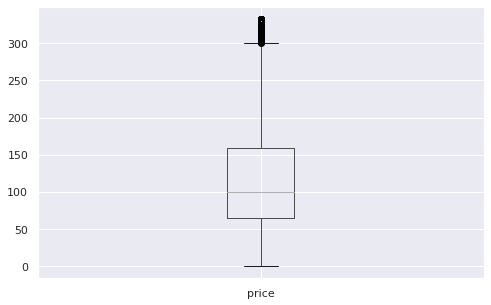

In [80]:
df_air_pnw1.boxplot(column='price') #the boxplot for price now looks good without outliers!

In [81]:
#skewness and kurtosis
print("Skewness: %f" % df_air_pnw1['price'].skew())
print("Kurtosis: %f" % df_air_pnw1['price'].kurt())

Skewness: 0.922840
Kurtosis: 0.169245


Let's check for the distribution of this new price as well.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


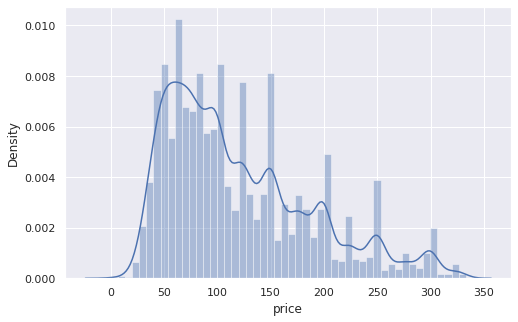

In [82]:
sns.distplot(df_air_pnw1['price'])

**Bi-variate Analysis!**

Now let's understand the distribution of price(without extreme values) along neighbourhood groups

In [83]:
df_air_pnw1['neighbourhood_group'].value_counts()

Manhattan        19484
Brooklyn         19400
Queens            5565
Bronx             1068
Staten Island      365
Name: neighbourhood_group, dtype: int64

In [84]:
#lets look at the distribution of prices(price trends) across neighbourhood groups!

**Distribution of price across Manhattan,Brooklyn,Queens,Bronx & Staten Island :-**

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group. <br>

We can do a seaborn point plot to get the average prices/neighbourhood in NYC! 

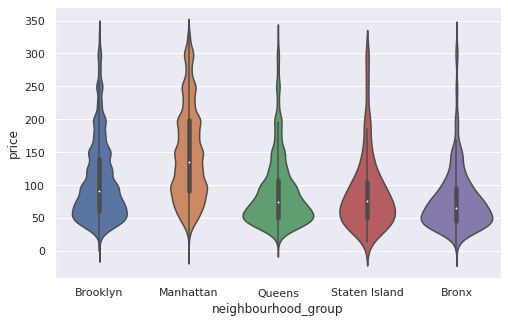

In [85]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=df_air_pnw1)


In [86]:
from numpy import mean

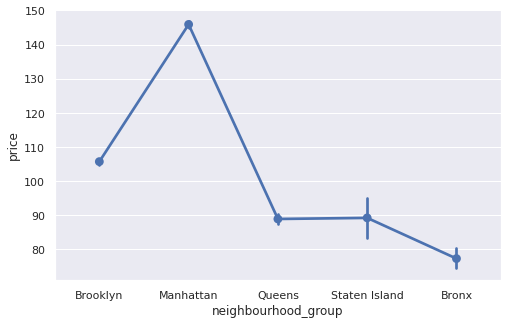

In [87]:
sns.pointplot(x = 'neighbourhood_group', y='price', data=df_air_pnw1, estimator=mean)

We can see that **Manhattan** has the highest(the costliest) average of price ranging to ~150dollars/day followed by **Brooklyn** with an average of 105dollars<br> 

**Queens** and **Staten Island** have same average price/day, while **Bronx** comes out to be the cheapest neighbourhood group in NYC. 

Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

**Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!**

**The costliest?**

In [88]:
df_air_pnw.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Upper West Side,Lisa,Entire home/apt
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,Manhattan,Hell's Kitchen,Rogelio,Entire home/apt
46533,Amazing Chelsea 4BR Loft!,Manhattan,Chelsea,Viberlyn,Entire home/apt
30824,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,Manhattan,Nolita,Ilo And Richard,Entire home/apt
22992,"Modern Townhouse for Photo, Film & Daytime Ev...",Manhattan,Upper West Side,Lanie,Entire home/apt


Looks like the all the top 5 costliest listings belongs to Manhattan itself(being the most costliest place of living in NYC)

**The cheapest?**

In [89]:
df_air_pnw.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
30312,Nice room near SI Ferry \n15 minutes by car.,Staten Island,Randall Manor,Sara I,Private room,31
7431,Cozy room right on BROADWAY - Washington Heights,Manhattan,Washington Heights,Nga,Private room,31
28700,Cozy room in Loft Apartment - Brooklyn,Queens,Ridgewood,Estefani,Private room,31
35038,Lovely place for traveler,Brooklyn,Bedford-Stuyvesant,Anchor,Shared room,31
43694,Gotham City oasis 10 min to the city,Brooklyn,Fort Greene,Helena,Shared room,31


Also, the cheapest listings mostly comes from **Staten Island**, **Queens** and **Brooklyn**. One interesting thing to notice here is that there is no listings for **Bronx**(the cheapest neighbourhood group in entire NYC) in the top(5) cheapest. 

**Top neighbourhoods in NYC with respect to average price/day of Airbnb listings**:

Among the top 5 neighbourhoods, top 2 of them namely: **Willowbrook** & **Neponsit** origins from neighbourhood_groups: **Staten Island** & **Queens** respectively. <br>

The rest 3 are backed by **Tribeca** and **NoHo** from **Manhattan** & **Breezy Point**(3) again from **Queens**. 

In [90]:
df_ngrp= df_air_pnw1.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
largest_neighbours_df= df_ngrp.nlargest(5,'price')
largest_neighbours_df

,neighbourhood_group,neighbourhood,price
218,Staten Island,Willowbrook,249.000000
163,Queens,Neponsit,237.000000
134,Queens,Breezy Point,213.333333
121,Manhattan,Tribeca,212.495327
115,Manhattan,NoHo,205.290909


**Now, let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC!**

In [91]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
218,Staten Island,Willowbrook,249.000000
163,Queens,Neponsit,237.000000
121,Manhattan,Tribeca,212.495327
82,Brooklyn,Mill Basin,179.750000
44,Bronx,West Farms,122.000000


Text(0, 0.5, 'price')

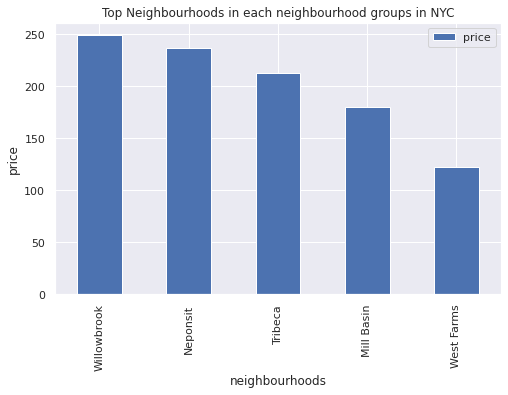

In [92]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

# check for annotations inside bars for putting group name

**Let's checkout the costliest listings in each neighbourhood groups & their respective hosts:**

In [153]:
#costliest listings in each neighbourhood groups
costliest_df= df_air_pnw.loc[df_air_pnw.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

In [154]:
costliest_df

,name,neighbourhood_group,host_name,price
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


**Also, the cheapest listings in each neighbourhood groups & their respective hosts:**

We can do the analysis here using the dataframe having the lowerbound and upperbound values of price.

In [95]:
#cheapest listings in each neighbourhood groups
cheapest_df= df_air_pnw.loc[df_air_pnw.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]

In [96]:
cheapest_df

,neighbourhood_group,name,host_name,price
3889,Bronx,"A Simple, Calm Space",Août,32
2887,Brooklyn,Amazing Spacious Room,Lord Daniel,31
7431,Manhattan,Cozy room right on BROADWAY - Washington Heights,Nga,31
6615,Queens,"Super Clean, Quiet & Spacious Room",Troy,31
30312,Staten Island,Nice room near SI Ferry \n15 minutes by car.,Sara I,31


**Room_types vs price on different neighbourhood groups!**

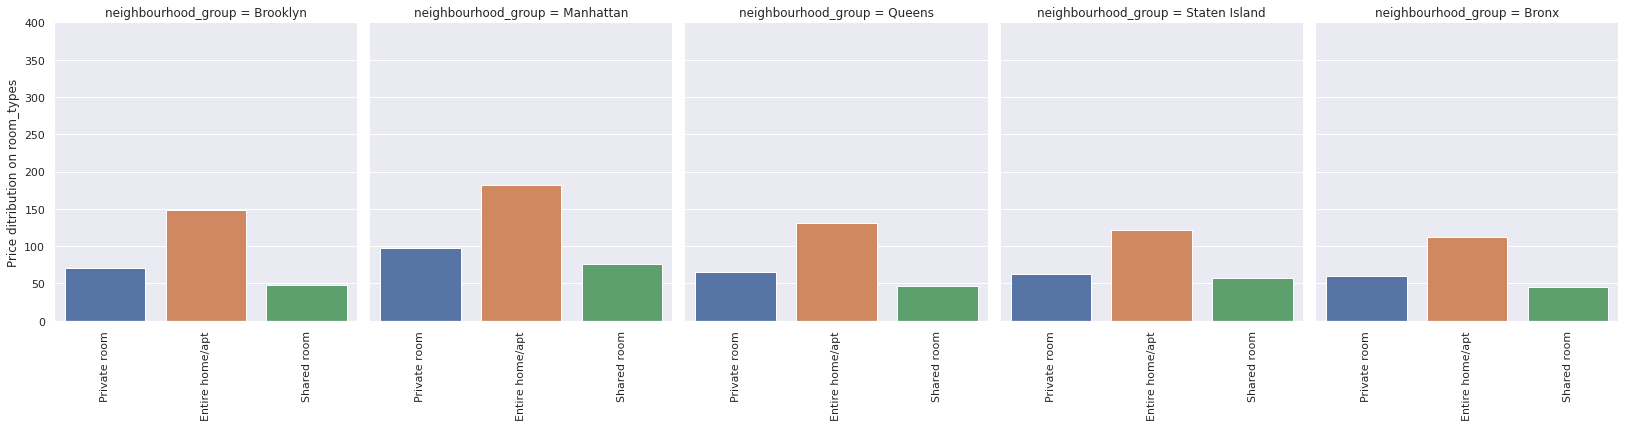

In [97]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_air_pnw1, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ditribution on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 


Looks like a property/listing with Entire home/apt as room_type wins the show at NYC followed by private rooms. <br>

Manhattan has the highest price for room types providing Entire home/apt  ranging to nearly 180 USD/night, followed by Private room & shared room to 100 & 60USD's.

In [99]:
df_air_pnw['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**On an average for how many nights people stayed in each room_types!**

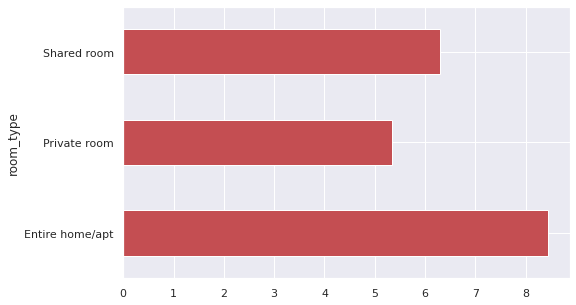

In [143]:
# min_night= df_air_pnw['room_type']
df_air_pnw.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
# ax = sns.swarmplot(x="room_type", y="minimum_nights", data=df_air)

Looking at these it clearly indicates that people mostly prefer living in an entire home/apt on an average of more than 8 nights followed by guests who stayed in shared room where average stay is 6-7 nights.

In [107]:
df_air_pnw.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365


**Most reviewed listings in NYC!**

In [124]:
top_reviewed_listings= df_air.nlargest(10,'number_of_reviews')
top_reviewed_listings[['name','number_of_reviews']]

,name,number_of_reviews
11759,Room near JFK Queen Bed,629
2031,Great Bedroom in Manhattan,607
2030,Beautiful Bedroom in Manhattan,597
2015,Private Bedroom in Manhattan,594
13495,Room Near JFK Twin Beds,576
10623,Steps away from Laguardia airport,543
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,540
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,510
4870,Private brownstone studio Brooklyn,488
471,LG Private Room/Family Friendly,480


**Let's find the most reviewed hosts as well.**

Text(0, 0.5, 'Reviews counts')

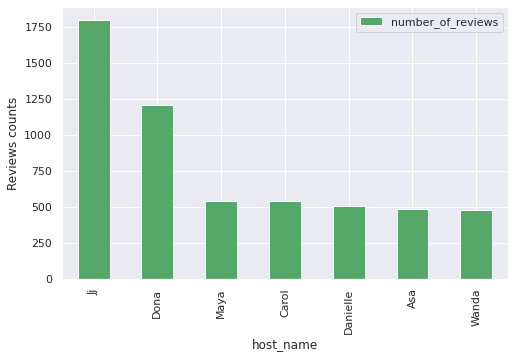

In [127]:
reviews_df=top_reviewed_listings.groupby('host_name')['number_of_reviews'].sum()
reviews_df=reviews_df.reset_index().sort_values(by='number_of_reviews',ascending=False)
reviews_df.plot(x='host_name',y='number_of_reviews',kind='bar',color='g')
plt.ylabel('Reviews counts')

**Hosts with most no of listings in NYC(on the basis of host listings count):**

In [128]:
df_air_pnw.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365


In [138]:
host_with_most_listings= df_air_pnw.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13081,Sonder (NYC),Manhattan,106929
1815,Blueground,Manhattan,53360
7209,Kara,Manhattan,14669
6481,Jeremy & Laura,Manhattan,9216
13080,Sonder,Manhattan,9216
2876,Corporate Housing,Manhattan,8281
7411,Kazuya,Queens,7725
7476,Ken,Manhattan,7500
11292,Pranjal,Manhattan,4225
9759,Mike,Manhattan,2823


So, Sonder(NYC) leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara. <br>

Also, all 3 of them has their listings on Manhattan.

We can also check for **hosts with most listings in each neighbourhood group**.<br>

The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

In [151]:
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13081,Sonder (NYC),Manhattan,106929
7411,Kazuya,Queens,7725
14290,Vida,Brooklyn,2705
14293,Vie,Bronx,169
679,Amarjit S,Staten Island,64


So, Sonder (NYC), Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

In [152]:
df_air_pnw.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365


**Let's see what can be done with latitude and longitude!**

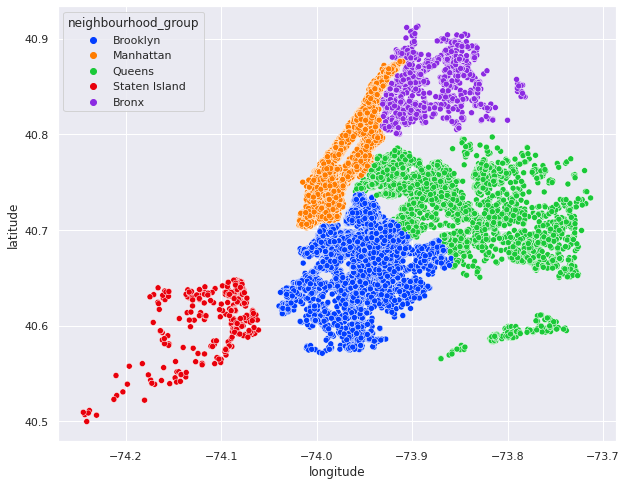

In [188]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df_air_pnw, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')


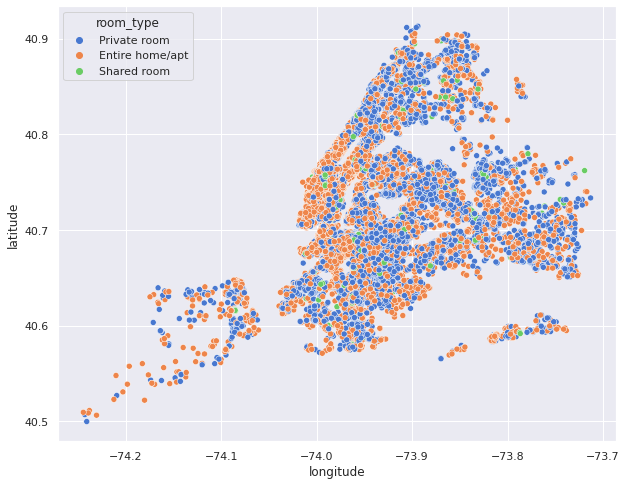

In [193]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df_air_pnw.longitude, y=df_air_pnw.latitude,hue=df_air.room_type,palette='muted')


By the two scatterplots of latitude vs longitude we can infer, there are hardly any shared room throughout NYC. 95% of the listings on Airbnb are either Private room or Entire/home apt. <br>

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.